In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HDFCBANK.NS 2011-2019.csv to HDFCBANK.NS 2011-2019.csv


In [ ]:
hdfc = pd.read_csv('HDFCBANK.NS 2011-2019.csv')
hdfc

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2011,237.000000,239.964996,235.039993,239.050003,217.198608,5398390.0
1,1/4/2011,238.649994,238.800003,233.300003,234.554993,213.114487,8284130.0
2,1/5/2011,234.970001,234.970001,229.750000,230.820007,209.720901,7825920.0
3,1/6/2011,231.600006,234.264999,230.899994,232.774994,211.497177,5435090.0
4,1/7/2011,232.619995,232.619995,226.100006,226.945007,206.200119,7948010.0
...,...,...,...,...,...,...,...
2213,12/24/2019,1298.599976,1301.099976,1286.949951,1289.150024,1254.455811,3589604.0
2214,12/26/2019,1289.699951,1291.849976,1264.650024,1270.449951,1236.259033,7474879.0
2215,12/27/2019,1272.000000,1279.000000,1270.000000,1275.000000,1240.686523,3546496.0
2216,12/30/2019,1282.000000,1288.750000,1274.050049,1282.150024,1247.644165,4667095.0


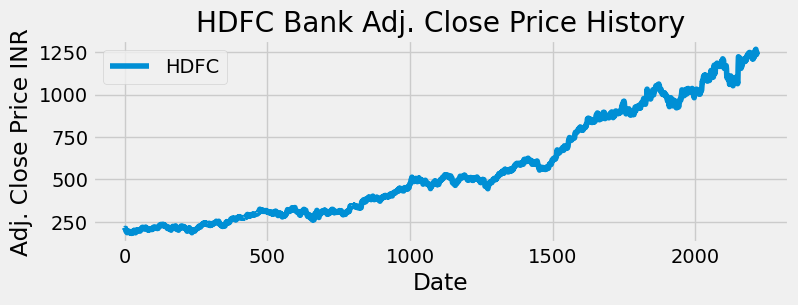

In [ ]:
plt.figure(figsize=(8,2.5))
plt.plot(hdfc['Adj Close'], label = 'HDFC')
plt.title('HDFC Bank Adj. Close Price History')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price INR')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
SMA15 = pd.DataFrame()
SMA15['Adj Close Price'] = hdfc['Adj Close'].rolling(window=5).mean()
SMA15

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,211.546258
...,...
2213,1259.058472
2214,1254.796338
2215,1252.110620
2216,1249.278931


In [ ]:
SMA150 = pd.DataFrame()
SMA150['Adj Close Price'] = hdfc['Adj Close'].rolling(window=50).mean()
SMA150

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2213,1222.588123
2214,1223.873572
2215,1224.884607
2216,1226.072749


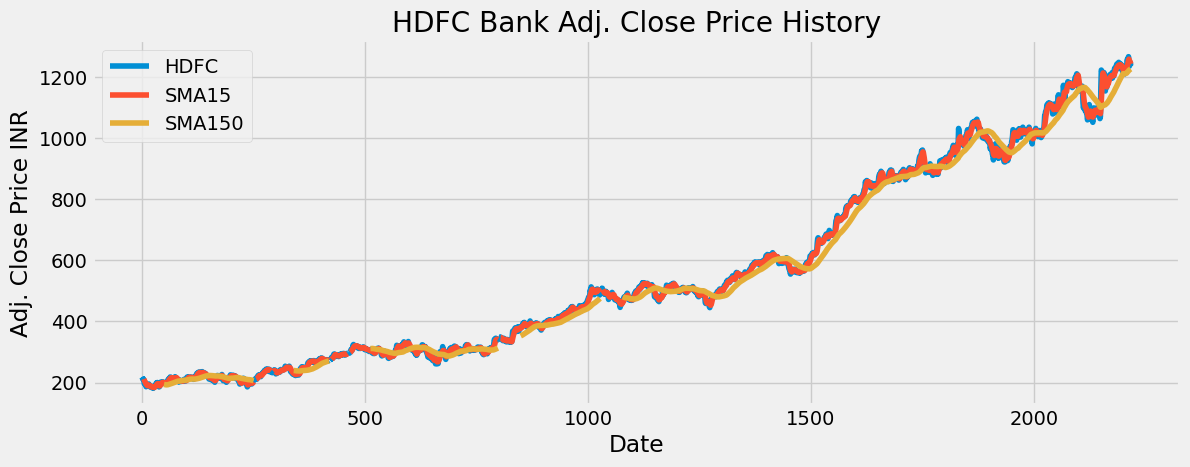

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(hdfc['Adj Close'], label = 'HDFC')
plt.plot(SMA15['Adj Close Price'], label = 'SMA15')
plt.plot(SMA150['Adj Close Price'], label = 'SMA150')
plt.title('HDFC Bank Adj. Close Price History')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price INR')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
data = pd.DataFrame()
data['HDFC Bank'] = hdfc['Adj Close']
data['SMA15'] = SMA15['Adj Close Price']
data['SMA150'] = SMA150['Adj Close Price']
data

,HDFC Bank,SMA15,SMA150
0,217.198608,NaN,NaN
1,213.114487,NaN,NaN
2,209.720901,NaN,NaN
3,211.497177,NaN,NaN
4,206.200119,211.546258,NaN
...,...,...,...
2213,1254.455811,1259.058472,1222.588123
2214,1236.259033,1254.796338,1223.873572
2215,1240.686523,1252.110620,1224.884607
2216,1247.644165,1249.278931,1226.072749


In [ ]:
pip install ta

In [ ]:
import pandas as pd
from ta import momentum

# Assuming you have a DataFrame called 'data' with a 'Close' column
# You can replace 'data' with your actual DataFrame name

# Calculate RSI with a period of 14
data['RSI'] = momentum.RSIIndicator(data['HDFC Bank'], window=14).rsi()

# Access the RSI values
rsi_values = data['RSI']

In [ ]:
#Generating BUY & SELL Signals
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA15'][i] > data['SMA150'][i] and data['RSI'][i] <50:
      if flag != 1:
        sigPriceBuy.append(data['HDFC Bank'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA15'][i] < data['SMA150'][i] and data['RSI'][i] >50:
      if flag !=0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['HDFC Bank'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return(sigPriceBuy, sigPriceSell)

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price
0,217.198608,NaN,NaN,NaN,NaN,NaN
1,213.114487,NaN,NaN,NaN,NaN,NaN
2,209.720901,NaN,NaN,NaN,NaN,NaN
3,211.497177,NaN,NaN,NaN,NaN,NaN
4,206.200119,211.546258,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2213,1254.455811,1259.058472,1222.588123,59.682545,NaN,NaN
2214,1236.259033,1254.796338,1223.873572,51.032376,NaN,NaN
2215,1240.686523,1252.110620,1224.884607,52.823997,NaN,NaN
2216,1247.644165,1249.278931,1226.072749,55.574778,NaN,NaN


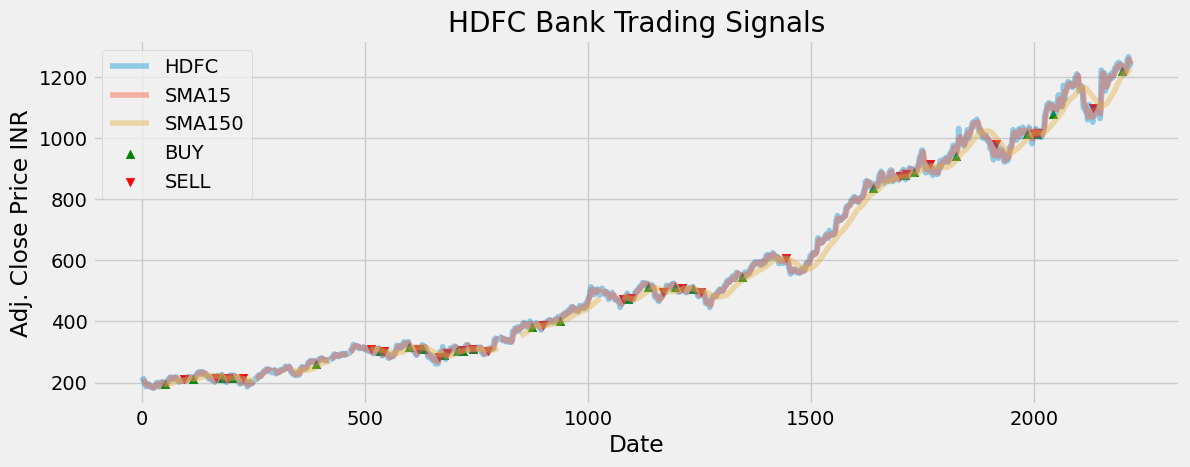

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data['HDFC Bank'], label = 'HDFC', alpha=0.4)
plt.plot(data['SMA15'], label = 'SMA15', alpha=0.4)
plt.plot(data['SMA150'], label = 'SMA150', alpha=0.4)
plt.scatter(data.index, data['Buy_Signal_Price'], label='BUY', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='SELL', marker='v', color='red')
plt.title('HDFC Bank Trading Signals')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price INR')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Calculate the EMA for HDFC stock
EMA15 = pd.DataFrame()
ema_span = 9
EMA15['Adj Close Price'] = hdfc['Adj Close'].ewm(span=ema_span).mean()
EMA15

,Adj Close Price
0,217.198608
1,214.929652
2,212.794918
3,212.355304
4,210.524275
...,...
2213,1248.268534
2214,1245.866633
2215,1244.830611
2216,1245.393322


In [ ]:
# Calculate the EMA for HDFC stock
EMA100 = pd.DataFrame()
ema_span = 30
EMA100['Adj Close Price'] = hdfc['Adj Close'].ewm(span=ema_span).mean()
EMA100

,Adj Close Price
0,217.198608
1,215.088479
2,213.178726
3,212.715398
4,211.233014
...,...
2213,1231.701876
2214,1231.995886
2215,1232.556573
2216,1233.529966


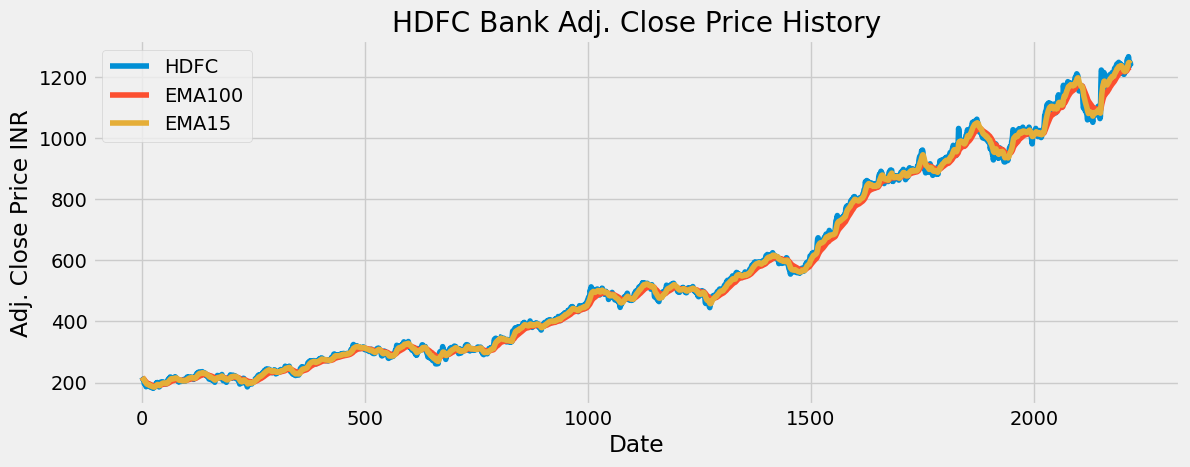

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(hdfc['Adj Close'], label = 'HDFC')
plt.plot(EMA100['Adj Close Price'], label = 'EMA100')
plt.plot(EMA15['Adj Close Price'], label = 'EMA15')
plt.title('HDFC Bank Adj. Close Price History')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price INR')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
data['EMA100'] = EMA100['Adj Close Price']
data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100
0,217.198608,NaN,NaN,NaN,NaN,NaN,217.198608
1,213.114487,NaN,NaN,NaN,NaN,NaN,215.088479
2,209.720901,NaN,NaN,NaN,NaN,NaN,213.178726
3,211.497177,NaN,NaN,NaN,NaN,NaN,212.715398
4,206.200119,211.546258,NaN,NaN,NaN,NaN,211.233014
...,...,...,...,...,...,...,...
2213,1254.455811,1259.058472,1222.588123,59.682545,NaN,NaN,1231.701876
2214,1236.259033,1254.796338,1223.873572,51.032376,NaN,NaN,1231.995886
2215,1240.686523,1252.110620,1224.884607,52.823997,NaN,NaN,1232.556573
2216,1247.644165,1249.278931,1226.072749,55.574778,NaN,NaN,1233.529966


In [ ]:
data['EMA15'] = EMA15['Adj Close Price']
data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15
0,217.198608,NaN,NaN,NaN,NaN,NaN,217.198608,217.198608
1,213.114487,NaN,NaN,NaN,NaN,NaN,215.088479,214.929652
2,209.720901,NaN,NaN,NaN,NaN,NaN,213.178726,212.794918
3,211.497177,NaN,NaN,NaN,NaN,NaN,212.715398,212.355304
4,206.200119,211.546258,NaN,NaN,NaN,NaN,211.233014,210.524275
...,...,...,...,...,...,...,...,...
2213,1254.455811,1259.058472,1222.588123,59.682545,NaN,NaN,1231.701876,1248.268534
2214,1236.259033,1254.796338,1223.873572,51.032376,NaN,NaN,1231.995886,1245.866633
2215,1240.686523,1252.110620,1224.884607,52.823997,NaN,NaN,1232.556573,1244.830611
2216,1247.644165,1249.278931,1226.072749,55.574778,NaN,NaN,1233.529966,1245.393322


In [ ]:
data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15
0,217.198608,NaN,NaN,NaN,NaN,NaN,217.198608,217.198608
1,213.114487,NaN,NaN,NaN,NaN,NaN,215.088479,214.929652
2,209.720901,NaN,NaN,NaN,NaN,NaN,213.178726,212.794918
3,211.497177,NaN,NaN,NaN,NaN,NaN,212.715398,212.355304
4,206.200119,211.546258,NaN,NaN,NaN,NaN,211.233014,210.524275
...,...,...,...,...,...,...,...,...
2213,1254.455811,1259.058472,1222.588123,59.682545,NaN,NaN,1231.701876,1248.268534
2214,1236.259033,1254.796338,1223.873572,51.032376,NaN,NaN,1231.995886,1245.866633
2215,1240.686523,1252.110620,1224.884607,52.823997,NaN,NaN,1232.556573,1244.830611
2216,1247.644165,1249.278931,1226.072749,55.574778,NaN,NaN,1233.529966,1245.393322


In [ ]:
#Generating BUY & SELL Signals
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['EMA15'][i] > data['EMA100'][i] and data['RSI'][i] < 45:
      if flag != 1:
        sigPriceBuy.append(data['HDFC Bank'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['EMA15'][i] < data['EMA100'][i] and data['RSI'][i]>55:
      if flag !=0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['HDFC Bank'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return(sigPriceBuy, sigPriceSell)

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal_PriceEMA'] = buy_sell[0]
data['Sell_Signal_PriceEMA'] = buy_sell[1]

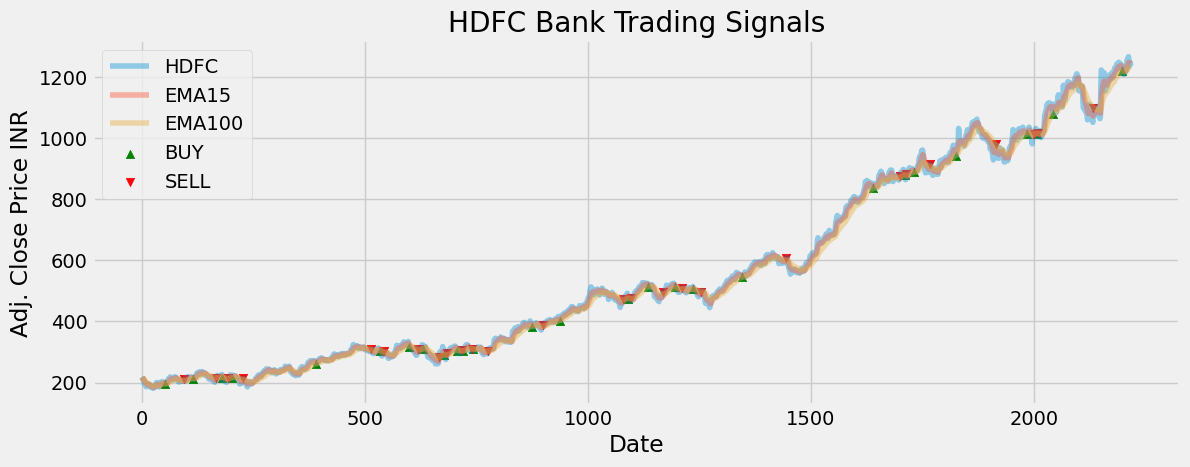

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data['HDFC Bank'], label = 'HDFC', alpha=0.4)
plt.plot(data['EMA15'], label = 'EMA15', alpha=0.4)
plt.plot(data['EMA100'], label = 'EMA100', alpha=0.4)
plt.scatter(data.index, data['Buy_Signal_Price'], label='BUY', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='SELL', marker='v', color='red')
plt.title('HDFC Bank Trading Signals')
plt.xlabel('Date')
plt.ylabel('Adj. Close Price INR')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15,Buy_Signal_PriceEMA,Sell_Signal_PriceEMA
0,217.198608,NaN,NaN,NaN,NaN,NaN,217.198608,217.198608,NaN,NaN
1,213.114487,NaN,NaN,NaN,NaN,NaN,215.088479,214.929652,NaN,NaN
2,209.720901,NaN,NaN,NaN,NaN,NaN,213.178726,212.794918,NaN,NaN
3,211.497177,NaN,NaN,NaN,NaN,NaN,212.715398,212.355304,NaN,NaN
4,206.200119,211.546258,NaN,NaN,NaN,NaN,211.233014,210.524275,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2213,1254.455811,1259.058472,1222.588123,59.682545,NaN,NaN,1231.701876,1248.268534,NaN,NaN
2214,1236.259033,1254.796338,1223.873572,51.032376,NaN,NaN,1231.995886,1245.866633,NaN,NaN
2215,1240.686523,1252.110620,1224.884607,52.823997,NaN,NaN,1232.556573,1244.830611,NaN,NaN
2216,1247.644165,1249.278931,1226.072749,55.574778,NaN,NaN,1233.529966,1245.393322,NaN,NaN


In [ ]:
new_data = data[data['Buy_Signal_Price'].notnull() | data['Sell_Signal_Price'].notnull()]
new_EMAdat = data[data['Buy_Signal_PriceEMA'].notnull() | data['Sell_Signal_PriceEMA'].notnull()]

In [ ]:
new_data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15,Buy_Signal_PriceEMA,Sell_Signal_PriceEMA
52,195.283386,198.326270,192.880629,48.813558,195.283386,NaN,195.361567,197.811414,NaN,NaN
94,210.402344,206.474503,207.336305,55.444723,NaN,210.402344,207.237381,206.662746,NaN,210.402344
115,210.332092,214.935815,211.146219,44.488232,210.332092,NaN,212.613959,214.623719,210.332092,NaN
165,215.890030,207.404468,221.404792,51.453389,NaN,215.890030,215.093687,209.667839,NaN,NaN
180,216.050140,222.006058,219.506039,47.612672,216.050140,NaN,218.016300,220.213904,NaN,NaN
193,213.694321,207.500555,214.006299,51.557703,NaN,213.694321,212.649413,209.588000,NaN,NaN
202,214.083160,221.470853,214.242795,47.650660,214.083160,NaN,215.866763,218.391383,NaN,NaN
226,213.168259,204.755896,212.861321,54.849846,NaN,213.168259,209.518287,205.317749,NaN,NaN
390,260.864166,264.783197,250.242511,48.760572,260.864166,NaN,260.720558,265.728936,NaN,NaN
514,309.067444,304.853381,311.416011,51.316267,NaN,309.067444,308.338783,306.166296,NaN,NaN


In [ ]:
new_EMAdat

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15,Buy_Signal_PriceEMA,Sell_Signal_PriceEMA
37,187.087921,194.246704,NaN,42.892425,NaN,NaN,191.064489,192.005258,187.087921,NaN
94,210.402344,206.474503,207.336305,55.444723,NaN,210.402344,207.237381,206.662746,NaN,210.402344
115,210.332092,214.935815,211.146219,44.488232,210.332092,NaN,212.613959,214.623719,210.332092,NaN
169,223.277756,217.367590,221.687675,59.154725,NaN,NaN,215.756886,214.821464,NaN,223.277756
181,208.776825,219.508423,219.144202,40.579593,NaN,NaN,217.420202,217.926488,208.776825,NaN
196,218.680450,214.746432,213.685631,56.800082,NaN,NaN,213.437323,213.288077,NaN,218.680450
211,212.276230,218.694174,215.750527,42.775057,NaN,NaN,217.558549,218.592761,212.276230,NaN
228,213.671463,209.641382,212.434527,55.152106,NaN,NaN,209.905754,207.977430,NaN,213.671463
300,228.195251,235.134674,NaN,43.750792,NaN,NaN,233.935546,234.685433,228.195251,NaN
354,237.824417,229.970145,237.661121,56.380693,NaN,NaN,232.958545,230.439552,NaN,237.824417


In [ ]:
new_data = new_data.reset_index(drop=True)

In [ ]:
new_EMAdat = new_EMAdat.reset_index(drop=True)

In [ ]:
new_data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15,Buy_Signal_PriceEMA,Sell_Signal_PriceEMA
0,195.283386,198.326270,192.880629,48.813558,195.283386,NaN,195.361567,197.811414,NaN,NaN
1,210.402344,206.474503,207.336305,55.444723,NaN,210.402344,207.237381,206.662746,NaN,210.402344
2,210.332092,214.935815,211.146219,44.488232,210.332092,NaN,212.613959,214.623719,210.332092,NaN
3,215.890030,207.404468,221.404792,51.453389,NaN,215.890030,215.093687,209.667839,NaN,NaN
4,216.050140,222.006058,219.506039,47.612672,216.050140,NaN,218.016300,220.213904,NaN,NaN
5,213.694321,207.500555,214.006299,51.557703,NaN,213.694321,212.649413,209.588000,NaN,NaN
6,214.083160,221.470853,214.242795,47.650660,214.083160,NaN,215.866763,218.391383,NaN,NaN
7,213.168259,204.755896,212.861321,54.849846,NaN,213.168259,209.518287,205.317749,NaN,NaN
8,260.864166,264.783197,250.242511,48.760572,260.864166,NaN,260.720558,265.728936,NaN,NaN
9,309.067444,304.853381,311.416011,51.316267,NaN,309.067444,308.338783,306.166296,NaN,NaN


In [ ]:
new_EMAdat

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15,Buy_Signal_PriceEMA,Sell_Signal_PriceEMA
0,187.087921,194.246704,NaN,42.892425,NaN,NaN,191.064489,192.005258,187.087921,NaN
1,210.402344,206.474503,207.336305,55.444723,NaN,210.402344,207.237381,206.662746,NaN,210.402344
2,210.332092,214.935815,211.146219,44.488232,210.332092,NaN,212.613959,214.623719,210.332092,NaN
3,223.277756,217.367590,221.687675,59.154725,NaN,NaN,215.756886,214.821464,NaN,223.277756
4,208.776825,219.508423,219.144202,40.579593,NaN,NaN,217.420202,217.926488,208.776825,NaN
5,218.680450,214.746432,213.685631,56.800082,NaN,NaN,213.437323,213.288077,NaN,218.680450
6,212.276230,218.694174,215.750527,42.775057,NaN,NaN,217.558549,218.592761,212.276230,NaN
7,213.671463,209.641382,212.434527,55.152106,NaN,NaN,209.905754,207.977430,NaN,213.671463
8,228.195251,235.134674,NaN,43.750792,NaN,NaN,233.935546,234.685433,228.195251,NaN
9,237.824417,229.970145,237.661121,56.380693,NaN,NaN,232.958545,230.439552,NaN,237.824417


In [ ]:
success = 0
failed = 0

for i in range(0, 52, 2):
    if new_data['Buy_Signal_Price'][i] < new_data['Sell_Signal_Price'][i+1]:
        success = success + 1
    else:
        failed = failed + 1

In [ ]:
success

17

In [ ]:
failed

9

In [ ]:
SMAaccuracy = success/(success+failed)
SMAaccuracy

0.6538461538461539

In [ ]:
successEMA = 0
failedEMA = 0

for i in range(0,34, 2):
    if new_EMAdat['Buy_Signal_PriceEMA'][i] < new_EMAdat['Sell_Signal_PriceEMA'][i+1]:
        successEMA = successEMA + 1
    else:
        failedEMA = failedEMA + 1

In [ ]:
successEMA

12

In [ ]:
failedEMA

5

In [ ]:
EMAaccuracy = successEMA/(successEMA+failedEMA)
EMAaccuracy

0.7058823529411765

In [ ]:
data['Vol'] = hdfc['Volume']

In [ ]:
data

,HDFC Bank,SMA15,SMA150,RSI,Buy_Signal_Price,Sell_Signal_Price,EMA100,EMA15,Buy_Signal_PriceEMA,Sell_Signal_PriceEMA,Vol
0,217.198608,NaN,NaN,NaN,NaN,NaN,217.198608,217.198608,NaN,NaN,5398390.0
1,213.114487,NaN,NaN,NaN,NaN,NaN,215.088479,214.929652,NaN,NaN,8284130.0
2,209.720901,NaN,NaN,NaN,NaN,NaN,213.178726,212.794918,NaN,NaN,7825920.0
3,211.497177,NaN,NaN,NaN,NaN,NaN,212.715398,212.355304,NaN,NaN,5435090.0
4,206.200119,211.546258,NaN,NaN,NaN,NaN,211.233014,210.524275,NaN,NaN,7948010.0
...,...,...,...,...,...,...,...,...,...,...,...
2213,1254.455811,1259.058472,1222.588123,59.682545,NaN,NaN,1231.701876,1248.268534,NaN,NaN,3589604.0
2214,1236.259033,1254.796338,1223.873572,51.032376,NaN,NaN,1231.995886,1245.866633,NaN,NaN,7474879.0
2215,1240.686523,1252.110620,1224.884607,52.823997,NaN,NaN,1232.556573,1244.830611,NaN,NaN,3546496.0
2216,1247.644165,1249.278931,1226.072749,55.574778,NaN,NaN,1233.529966,1245.393322,NaN,NaN,4667095.0


In [ ]:
#SVM Predictions
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'data' with features and target column
# You can replace 'data' with your actual DataFrame name

# Split data into features (X) and target variable (y)
X = data[['RSI', 'Vol', 'SMA15', 'SMA150', 'EMA100', 'EMA15']]
y = data['HDFC Bank']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the data
X_train_scaled = imputer.fit_transform(X_train_scaled)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Convert y_train Series to a NumPy array
y_train_array = y_train.values

# Reshape the array
y_train_array = y_train_array.reshape(-1, 1)

# Fit the imputer on the training data and transform the target variable
y_train_array = imputer.fit_transform(y_train_array).flatten()

In [ ]:
# Train the SVM model
model = svm.SVR()
model.fit(X_train_scaled, y_train_array)

SVR()

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the test data
X_test_scaled = imputer.fit_transform(X_test_scaled)

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Reshape the arrays
y_test_array = y_test_array.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Fit the imputer on the training data and transform the test data
y_test_array = imputer.fit_transform(y_test_array).flatten()
y_pred = imputer.transform(y_pred).flatten()


In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test_array, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 106.12740182721383


In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the future features
future_features_imputed = imputer.fit_transform(future_features)

# Scale the imputed future features
future_features_scaled = scaler.transform(future_features_imputed)

# Make predictions for future stock prices
future_predictions = model.predict(future_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
future_features = data[['RSI', 'Vol', 'SMA15', 'SMA150', 'EMA100', 'EMA15']]

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the future features
future_features_imputed = imputer.fit_transform(future_features)

# Scale the imputed future features
future_features_scaled = scaler.transform(future_features_imputed)

# Make predictions for future stock prices
future_predictions = model.predict(future_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
missing_values = future_features.isnull().sum()
print(missing_values)

RSI        13
Vol         6
SMA15      34
SMA150    330
EMA100      0
EMA15       0
dtype: int64


In [ ]:
future_features_filled = future_features.fillna(future_features.mean())

In [ ]:
missing_valuesafter = future_features_filled.isnull().sum()
print(missing_valuesafter)

RSI       0
Vol       0
SMA15     0
SMA150    0
EMA100    0
EMA15     0
dtype: int64


In [ ]:
future_features_scaled = scaler.transform(future_features_filled)

In [ ]:
future_predictions = model.predict(future_features_scaled)

In [ ]:
future_predictions

array([384.14854009, 382.06241623, 380.90109801, ..., 855.10056518,
       859.19194798, 855.79774968])